# Prediction of Social media and Yearly Amount Spent for E-Commerce Using Learning Regression

## Task:
The Ecommerce company based in New York City decides whether to focus their efforts on their mobile app experience or their website and predict amount spent yearly by customers

### Customer Information

* Email: Email address of the customer
* Address: Address of the customer
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent: Total amount spent by the customer
* Avatar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('csv_files/Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.shape

(500, 8)

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Correlation

### Correlation between Time on Website and Yearly Amount Spent

C:\Users\Saheed\AppData\Local\Temp\ipykernel_8808\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

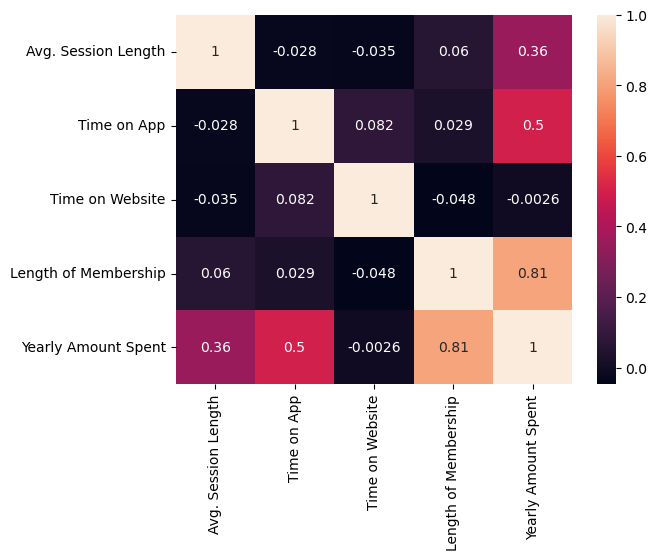

In [7]:
sns.heatmap(df.corr(), annot=True)

### Correlation between Time on App and Yearly Amount Spent

<Axes: >

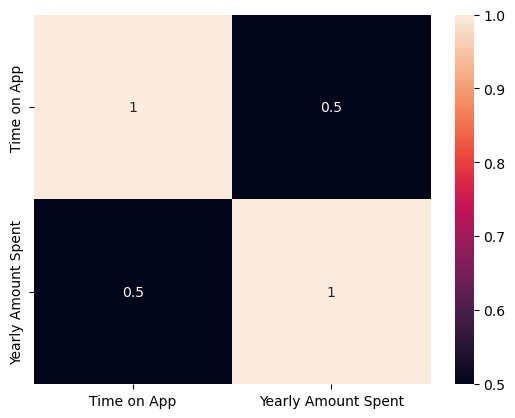

In [8]:
sns.heatmap(df[['Time on App', 'Yearly Amount Spent']].corr(), annot=True)

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

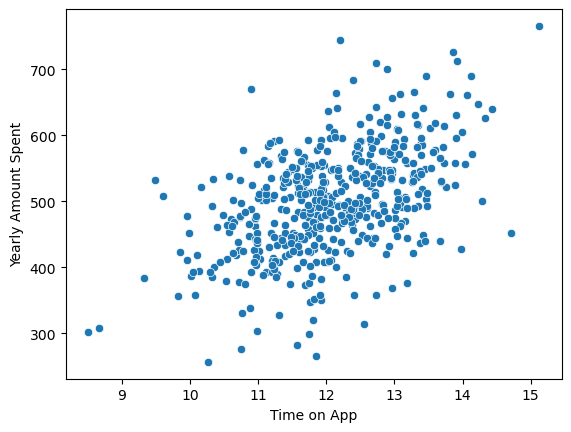

In [9]:
sns.scatterplot(x= 'Time on App', y= 'Yearly Amount Spent', data=df)

### Correlation between Time on Website and Yearly Amount Spent

<Axes: >

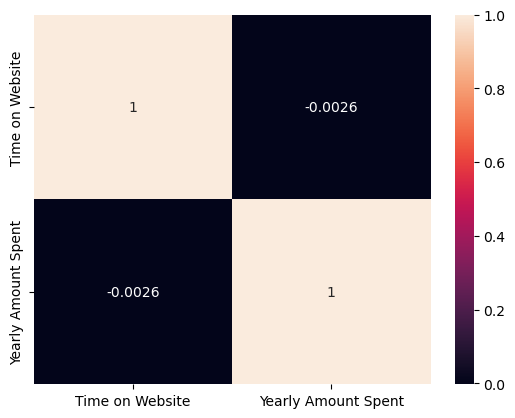

In [10]:
sns.heatmap(df[['Time on Website', 'Yearly Amount Spent']].corr(), annot=True)

<Axes: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

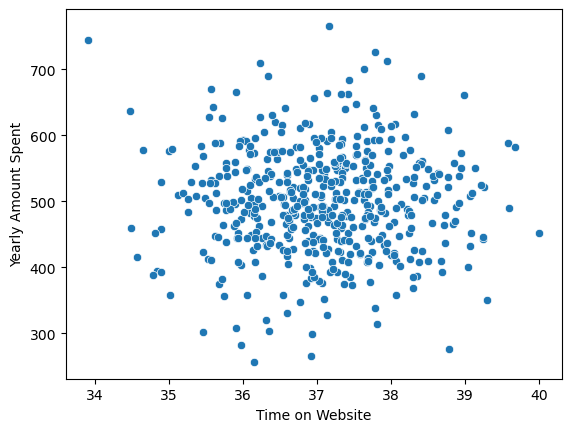

In [11]:
sns.scatterplot(x= 'Time on Website', y= 'Yearly Amount Spent', data=df)

### Correlation between Length of Membership and Yearly Amount Spent

<Axes: >

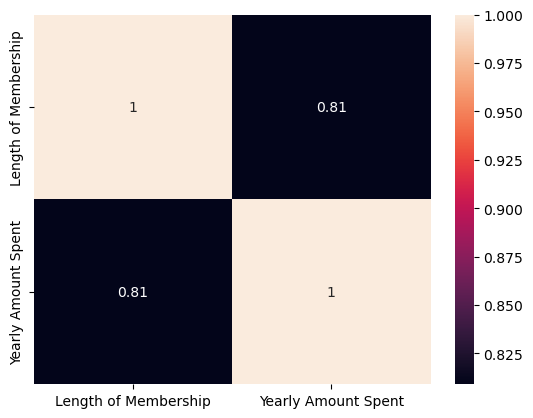

In [12]:
sns.heatmap(df[['Length of Membership', 'Yearly Amount Spent']].corr(), annot=True)

### Correlation between Length of Membership and Time on App

<Axes: >

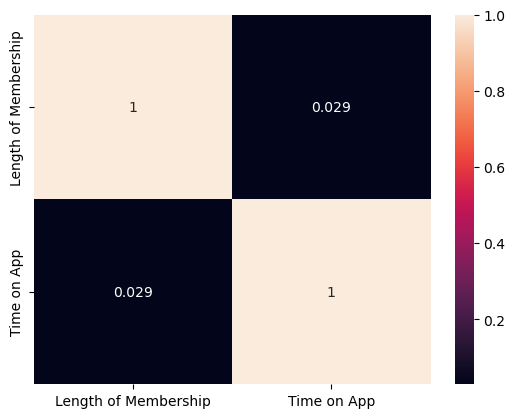

In [13]:
sns.heatmap(df[['Length of Membership', 'Time on App']].corr(), annot=True)

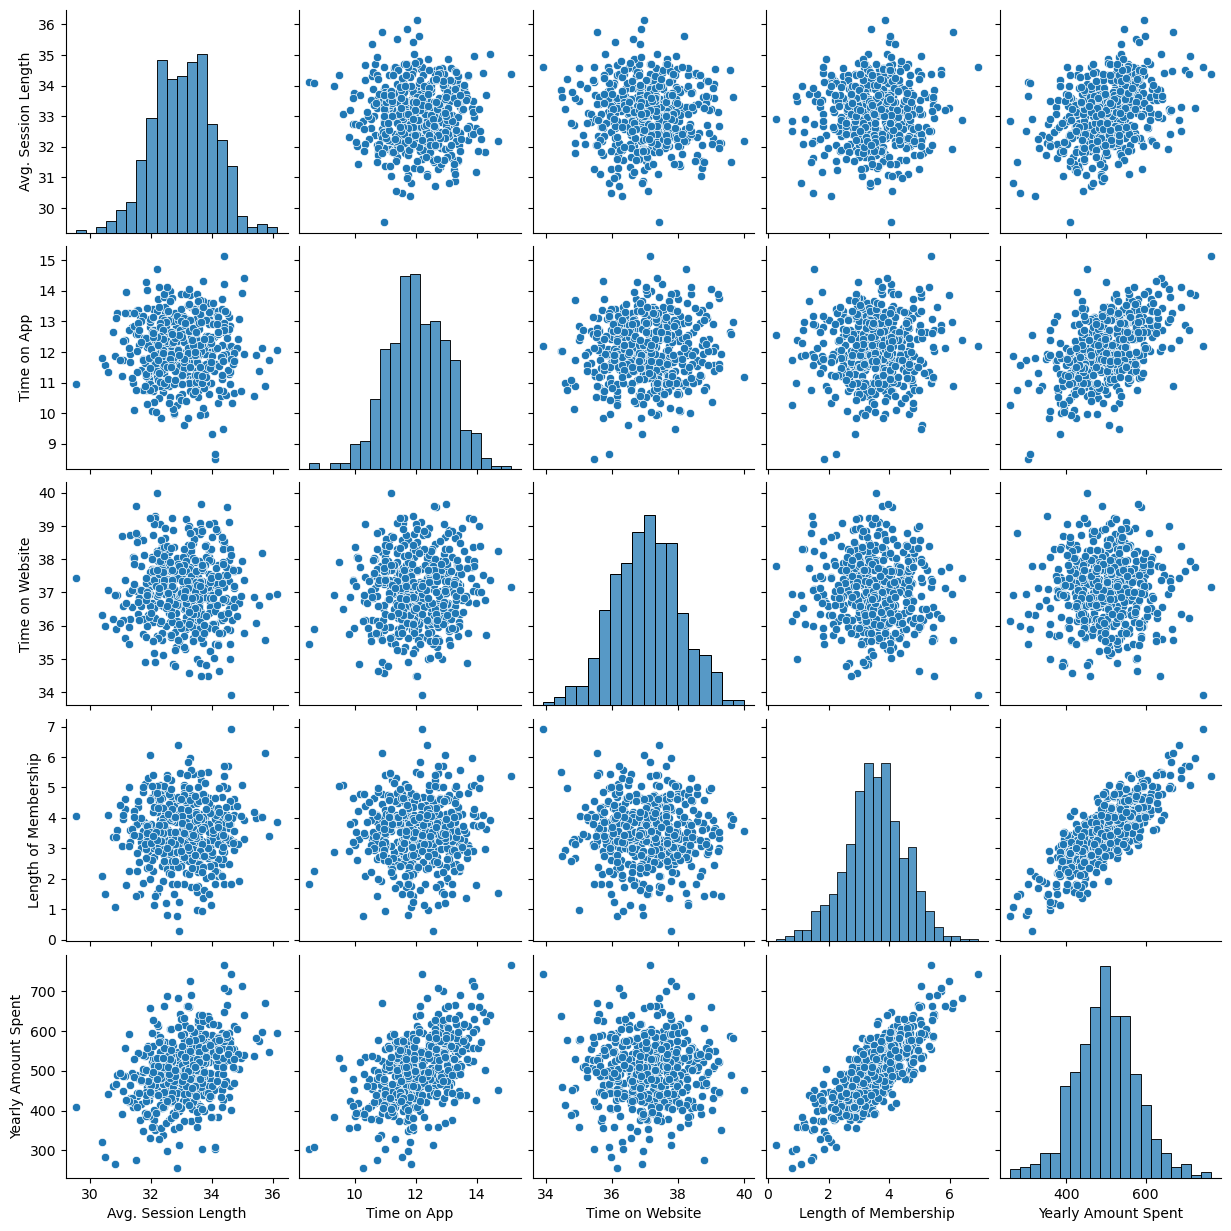

In [14]:
sns.pairplot(df)

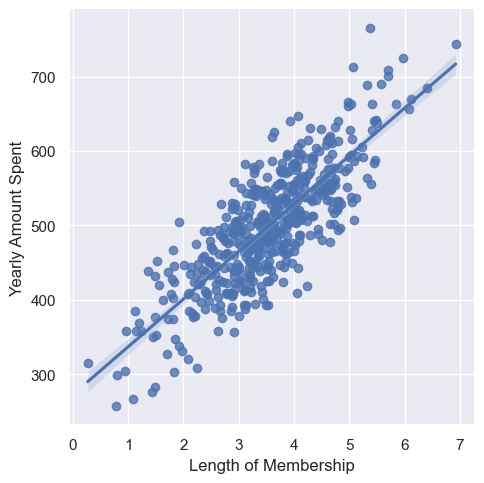

In [15]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=df)

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### Splitting the dataset into feature and target

#### Features data

In [17]:
#X = df.drop('Yearly Amount Spent', axis=True)
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [18]:
X.shape

(500, 4)

In [19]:
X.head(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034


#### Target data

In [20]:
y = df['Yearly Amount Spent']

In [21]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [22]:
y.shape

(500,)

### Training the target and the feature

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [24]:
print('Training Set Shape: {} {}'.format(X_train.shape, y_train.shape))
print('Testing Set Shape: {} {}'.format(X_test.shape, y_test.shape))

Training Set Shape: (400, 4) (400,)
Testing Set Shape: (100, 4) (100,)


### Create Linear Regression Model

In [25]:
lr = LinearRegression()

In [26]:
lr

LinearRegression()

### Train the model predict on the training set

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_predict = lr.predict(X_test)
y_predict.shape

(100,)

### Evaluate the performance of the model

In [29]:
df['Yearly Amount Spent'].mean()

499.31403825859053

In [30]:
R2 = r2_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
intercept = lr.intercept_
coeff = lr.coef_

In [31]:
print('R2 Score: {}'.format(R2))
print('Mean Absolute Error: {}'.format(MAE))
print('Mean Squared Error: {}'.format(MSE))
print('Root Mean Squared Error: {}'.format(RMSE))
print('Intercept: {}'.format(intercept))

R2 Score: 0.9778130629184127
Mean Absolute Error: 8.558441885315233
Mean Squared Error: 109.86374118393988
Root Mean Squared Error: 10.48159058463647
Intercept: -1044.257414636557


In [32]:
print('Coefficient: {}'.format(coeff))

Coefficient: [25.5962591  38.78534598  0.31038593 61.89682859]


### Plot Actual values Vs predicted values

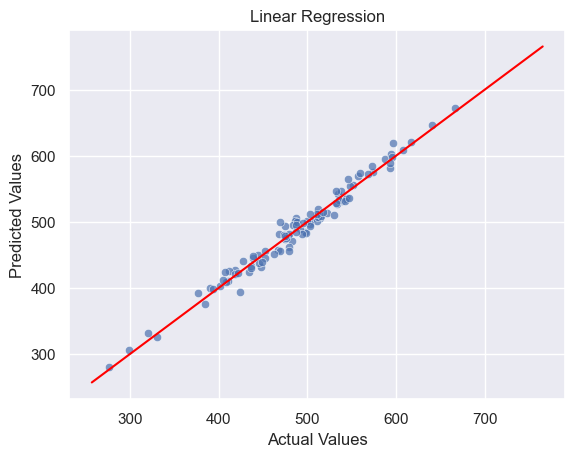

In [33]:
sns.scatterplot(x = y_test, y = y_predict, alpha= 0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color= 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

### Residual Plot

In [34]:
y_residual = y_test - y_predict

Text(0.5, 1.0, 'Residual Plot')

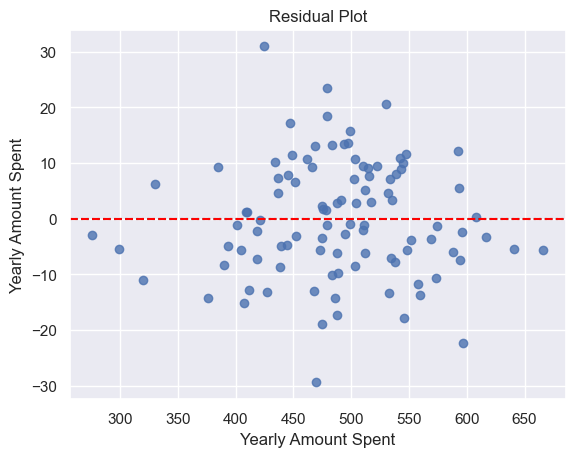

In [35]:
sns.residplot(x = y_test, y = y_residual)
plt.axhline(y = 0, color= 'red', ls= '--')
plt.title('Residual Plot')

### Coefficient Interpretation

In [36]:
final_model = LinearRegression()

In [37]:
final_model.fit(X, y)

LinearRegression()

In [38]:
final_model.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])

In [39]:
pd.DataFrame(final_model.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.734271
Time on App,38.709154
Time on Website,0.436739
Length of Membership,61.577324


In [89]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


## Conclusion

* The coefficient of Time on Website is 0.436739 which is very low compare to coefficient of Time on App which 38.709154.
* Time on Website needs to be canceled and the time should be diverted to the time spend on App for effective result. 
* Therefore the Ecommerce company should focus on mobile app.

### Deploying model to the world

In [40]:
from joblib import dump, load

In [41]:
dump(final_model, 'final_customers_model.joblib')

['final_customers_model.joblib']

In [42]:
loaded_model = load('final_customers_model.joblib')

In [43]:
loaded_model

LinearRegression()

In [44]:
loaded_model.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])

### Final Test: Predict the target for features

In [45]:
X.shape

(500, 4)

In [46]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [47]:
new_customer_data = [[34.497268, 12.655651, 39.577668, 4.082621]]

In [48]:
loaded_model.predict(new_customer_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([594.73931195])

In [49]:
new_customer_data = [[33.000915, 11.330278, 37.110597, 4.104543]]

In [50]:
loaded_model.predict(new_customer_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([505.20012327])

# Prediction of Social media for E-Commerce Using Polynomial Regression Model

In [51]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [52]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [53]:
poly_features = polynomial_converter.transform(X)

In [54]:
X.shape

(500, 4)

In [55]:
poly_features.shape

(500, 14)

In [56]:
X.iloc[0]

Avg. Session Length     34.497268
Time on App             12.655651
Time on Website         39.577668
Length of Membership     4.082621
Name: 0, dtype: float64

In [57]:
poly_features[0]

array([  34.49726773,   12.65565115,   39.57766802,    4.08262063,
       1190.0614805 ,  436.58538593, 1365.32140961,  140.839257  ,
        160.16550601,  500.88115975,   51.66822251, 1566.39180586,
        161.58060406,   16.66779123])

In [58]:
print(34.497268**2, 12.655651**2, 39.577668**2, 4.082621**2)
print(39.577668 * 4.082621, 34.497268*4.082621)

1190.0614994638238 160.16550223380102 1566.391804318224 16.667794229640997
161.580618507828 140.83927077942798


### Polynomial REgression: Training and Evaluate Model

#### Training the dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
y_predict = lr.predict(X_test)

### MAE and RMSE

In [63]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

In [64]:
print('Mean Absolute Error: {}'.format(MAE))
print('Root Mean Sqaured Error: {}'.format(RMSE))

Mean Absolute Error: 8.836198350858055
Root Mean Sqaured Error: 10.773569114822784


In [65]:
lr.coef_ 

array([ 4.64250852e+01,  4.64980226e+01, -2.84683189e+01,  8.40684359e+01,
       -5.03522481e-01,  3.72048256e-01,  2.59651192e-01, -4.89319325e-01,
        4.84103035e-01, -8.71403862e-01,  1.59599444e-01,  4.23983585e-01,
       -2.18353372e-01,  2.75974219e-02])

In [66]:
poly_features[0]

array([  34.49726773,   12.65565115,   39.57766802,    4.08262063,
       1190.0614805 ,  436.58538593, 1365.32140961,  140.839257  ,
        160.16550601,  500.88115975,   51.66822251, 1566.39180586,
        161.58060406,   16.66779123])

In [67]:
X.iloc[0]

Avg. Session Length     34.497268
Time on App             12.655651
Time on Website         39.577668
Length of Membership     4.082621
Name: 0, dtype: float64

In [68]:
train_rmse_errors = []
test_rmse_errors = []
degrees = 10
for degree in range(1, degrees):
    poly_converter = PolynomialFeatures(degree= degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [69]:
train_rmse_errors

[9.78889831537095,
 9.682924200733513,
 9.504032258961246,
 9.00417505205409,
 8.27643239572459,
 6.9056689245044565,
 8.530326328209082,
 3.469679827364779,
 7.9776471237617]

In [70]:
test_rmse_errors

[10.48159058463648,
 10.773569114822784,
 10.943954760178432,
 12.776449290040995,
 26.88002520000719,
 66.36643414026673,
 685.5633826978665,
 1464.9741188113824,
 2055.68911217728]

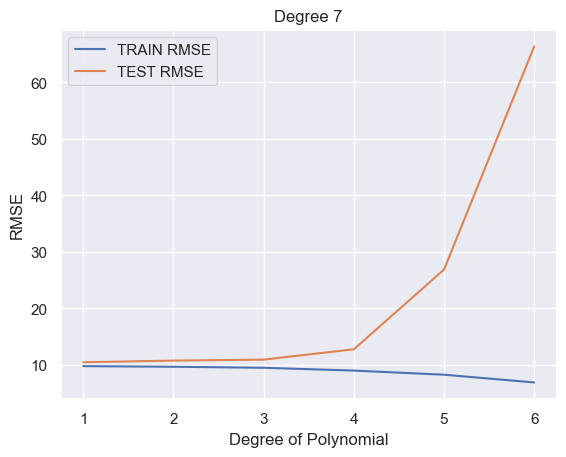

In [71]:
plt.plot(range(1, 7), train_rmse_errors[:6], label='TRAIN RMSE')
plt.plot(range(1, 7), test_rmse_errors[:6], label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Degree 7')
plt.legend()

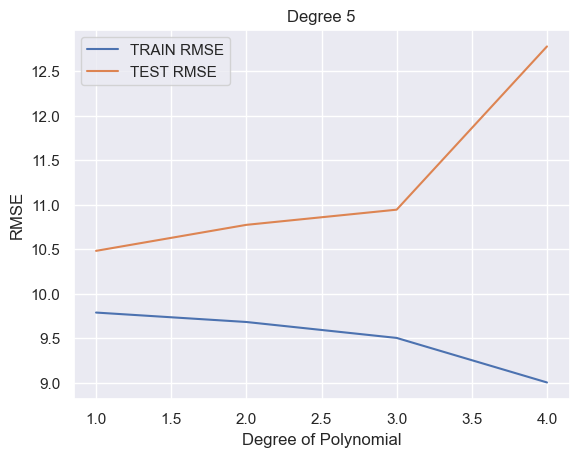

In [72]:
plt.plot(range(1, 5), train_rmse_errors[:4], label='TRAIN RMSE')
plt.plot(range(1, 5), test_rmse_errors[:4], label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Degree 5')
plt.legend()

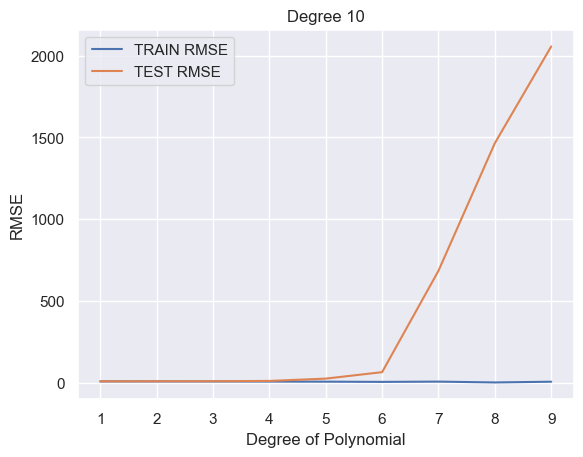

In [73]:
plt.plot(range(1, degrees), train_rmse_errors, label='TRAIN RMSE')
plt.plot(range(1, degrees), test_rmse_errors, label='TEST RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Degree 10')
plt.legend()

In [74]:
final_poly_converter = PolynomialFeatures(degree=degrees, include_bias=False)

In [75]:
final_model = LinearRegression()

In [76]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [77]:
from joblib import dump, load

In [78]:
dump(final_model, 'Final_poly_model.joblib')

['Final_poly_model.joblib']

In [79]:
dump(final_poly_converter, 'Final_converter.joblib')

['Final_converter.joblib']

In [80]:
loaded_converter = load('Final_converter.joblib')

In [81]:
loaded_model = load('Final_poly_model.joblib')

In [82]:
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [83]:
campaign = [[34.497268, 12.655651, 39.577668, 4.082621]]

In [84]:
loaded_converter.fit_transform(campaign).shape

(1, 1000)

In [85]:
tranformed_data = loaded_converter.fit_transform(campaign)
loaded_model.predict(tranformed_data)

array([588.83747576])

In [86]:
campaign = [[31.926272, 11.109461, 37.268959, 2.664034]]
tranformed_data = loaded_converter.fit_transform(campaign)
loaded_model.predict(tranformed_data)

array([393.57575701])

In [87]:
#[[33.000915, 11.330278, 37.110597, 4.104543]]
#array([505.20012327]) array([594.73931195])

In [88]:
campaign = [[34.497268, 12.655651, 39.577668, 4.082621]]
tranformed_data = loaded_converter.fit_transform(campaign)
loaded_model.predict(tranformed_data)

array([588.83747576])

# Conclusion

* The accuaracy for predicting Yearly Amount Spent using polynomial regression is better than using linear regression
* Therefore polynomial regression is a better model for predicting Yearly Amount Spent for the company.